# 1 数据可视化和摘要
## 数据摘要
标称属性：
+ census_block_group
+ visitor_home_cbgs
+ visitor_work_cbgs
+ related_same_day_brand
+ related_same_month_brand
+ top_brands

数值属性：
+ date_range_start
+ date_range_end
+ raw_visit_count
+ raw_visitor_count
+ distance_from_home
+ popularity_by_hour
+ popularity_by_day


In [1]:
import pandas as pd
data = pd.read_csv("cbg_patterns.csv")

### 对标称属性:给出每个可能取值的频数

In [2]:
Nominal_Attributes = ["visitor_home_cbgs", "visitor_work_cbgs","related_same_day_brand","related_same_month_brand","top_brands"]
valueCounts = []*len(Nominal_Attributes)

import json

# 统计可能取值的频数
def myValueCount(target):
    s={}
    for j in target:
        t=json.loads(j) # 用json.loads加载参数
        if isinstance(t, list):
            for i in t:
                if i in s:
                    s[i]+=1
                else: s[i]=1
        elif isinstance(t, dict):  # 如果是dict类型，则统计值
            for key, value in t.items():
                if key in s:
                    s[key] += value
                else: s[key] = value
                
    return s

# 打印前n个
def printSample(d,n):
    time=0
    for i in d.items():
        print(i)
        time+=1
        if time==n:
            return

for attribute in Nominal_Attributes:
    valueCounts.append(myValueCount(data[attribute]))
for i in range(len(valueCounts)):
    print("The top five items of ",Nominal_Attributes[i]," are:")
    printSample(valueCounts[i],5)
    print()

The top five items of  visitor_home_cbgs  are:
('010059501003', 1389)
('010059509001', 1562)
('010059509002', 778)
('010059505001', 1882)
('010059506002', 1042)

The top five items of  visitor_work_cbgs  are:
('010059501003', 2499)
('010810407002', 145400)
('010810420061', 22976)
('010690402024', 16644)
('010890111001', 142788)

The top five items of  related_same_day_brand  are:
('Chick-fil-A', 8910)
('mcdonalds', 46457)
('Marathon Petroleum', 5994)
('walmart', 43342)
('Shell Oil', 12630)

The top five items of  related_same_month_brand  are:
('walmart', 164347)
('mcdonalds', 206438)
('Dollar General', 61024)
('Chick-fil-A', 47050)
('Marathon Petroleum', 20576)

The top five items of  top_brands  are:
('CrossFit', 4392)
('Health Mart', 3444)
('Coldwell Banker', 500)
('Dollar General', 13515)
('Chick-fil-A', 1920)



这里只给出每个标称属性 每个可能取值频数的 前五个

### 数值属性:给出最大、最小、均值、中位数、四分位数及缺失值的个数

In [3]:
import numpy as np
Numeric_Attributes = ["date_range_start", "date_range_end", "raw_visit_count", "raw_visitor_count", "distance_from_home", "popularity_by_hour", "popularity_by_day"]
# these attributes can record directly
Numeric_Attributes_direct = ["date_range_start", "date_range_end", "raw_visit_count", "raw_visitor_count", "distance_from_home"]

data_numeric = data[Numeric_Attributes_direct].copy()
data_numeric.describe()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
count,2.207350e+05,2.207350e+05,2.206290e+05,2.206290e+05,2.205180e+05
mean,1.538352e+09,1.541030e+09,4.793066e+04,1.182032e+04,3.511280e+04
std,0.000000e+00,0.000000e+00,6.252655e+04,3.045832e+04,9.973193e+04
min,1.538352e+09,1.541030e+09,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.538352e+09,1.541030e+09,1.704200e+04,3.430000e+03,8.584000e+03
50%,1.538352e+09,1.541030e+09,3.064000e+04,6.541000e+03,1.461400e+04
75%,1.538352e+09,1.541030e+09,5.667800e+04,1.309900e+04,3.139775e+04
max,1.538352e+09,1.541030e+09,7.179900e+06,6.113949e+06,6.297845e+06


将"popularity_by_hour"属性中数据，按照index进行拆分，每个对应24小时中的一个

In [4]:

for hour in range(24):
    data_numeric[f"P_by_hour_{hour}"]=pd.Series([json.loads(hourlist)[hour] if len(json.loads(hourlist)) else np.nan for hourlist in (data["popularity_by_hour"])])



In [5]:
data_numeric.describe()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home,P_by_hour_0,P_by_hour_1,P_by_hour_2,P_by_hour_3,P_by_hour_4,...,P_by_hour_14,P_by_hour_15,P_by_hour_16,P_by_hour_17,P_by_hour_18,P_by_hour_19,P_by_hour_20,P_by_hour_21,P_by_hour_22,P_by_hour_23
count,2.207350e+05,2.207350e+05,2.206290e+05,2.206290e+05,2.205180e+05,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,...,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000
mean,1.538352e+09,1.541030e+09,4.793066e+04,1.182032e+04,3.511280e+04,2257.997552,2120.118615,2061.134751,2049.411578,2143.377534,...,4516.981448,4947.123873,5060.554152,5166.906694,4635.099452,3983.164625,3527.650440,3160.051349,2797.167045,2491.503334
std,0.000000e+00,0.000000e+00,6.252655e+04,3.045832e+04,9.973193e+04,2803.436153,2651.058966,2581.994313,2554.635219,2562.014265,...,5461.258857,5710.746376,5817.890234,5807.954488,5124.682979,4348.222777,3867.382108,3520.626740,3219.375910,2975.346044
min,1.538352e+09,1.541030e+09,6.000000e+01,5.000000e+01,7.060000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.538352e+09,1.541030e+09,1.704200e+04,3.430000e+03,8.584000e+03,1115.000000,1059.000000,1033.000000,1024.000000,1053.000000,...,1731.000000,1949.000000,1986.000000,2055.000000,1894.000000,1692.000000,1567.000000,1457.000000,1324.000000,1206.000000
50%,1.538352e+09,1.541030e+09,3.064000e+04,6.541000e+03,1.461400e+04,1706.000000,1611.000000,1567.000000,1556.000000,1614.000000,...,2975.000000,3323.000000,3384.000000,3497.000000,3183.000000,2784.000000,2522.000000,2304.000000,2067.000000,1861.000000
75%,1.538352e+09,1.541030e+09,5.667800e+04,1.309900e+04,3.139775e+04,2678.000000,2512.000000,2439.000000,2428.000000,2548.000000,...,5343.000000,5903.000000,6022.000000,6185.000000,5535.000000,4750.000000,4204.000000,3756.000000,3319.000000,2957.000000
max,1.538352e+09,1.541030e+09,7.179900e+06,6.113949e+06,6.297845e+06,408076.000000,414620.000000,415050.000000,423863.000000,389655.000000,...,442044.000000,428866.000000,411195.000000,394592.000000,341999.000000,293178.000000,374411.000000,377200.000000,379644.000000,396279.000000


可以看到属性中多了P_by_hour_0 ~ P_by_hour_24，下面对popularity_by_day进行类似操作


In [6]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in days:
    data_numeric[f"P_by_{day}"]=pd.Series([json.loads(series)[day] if len(json.loads(series)) else np.nan for series in data["popularity_by_day"]])

data_numeric.describe()
    

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home,P_by_hour_0,P_by_hour_1,P_by_hour_2,P_by_hour_3,P_by_hour_4,...,P_by_hour_21,P_by_hour_22,P_by_hour_23,P_by_Monday,P_by_Tuesday,P_by_Wednesday,P_by_Thursday,P_by_Friday,P_by_Saturday,P_by_Sunday
count,2.207350e+05,2.207350e+05,2.206290e+05,2.206290e+05,2.205180e+05,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000,...,220629.000000,220629.000000,220629.000000,2.206290e+05,2.206290e+05,220629.000000,220629.000000,220629.000000,220629.000000,220629.000000
mean,1.538352e+09,1.541030e+09,4.793066e+04,1.182032e+04,3.511280e+04,2257.997552,2120.118615,2061.134751,2049.411578,2143.377534,...,3160.051349,2797.167045,2491.503334,7.465803e+03,7.609147e+03,7530.830512,6307.621033,6991.368528,6368.928237,5656.961111
std,0.000000e+00,0.000000e+00,6.252655e+04,3.045832e+04,9.973193e+04,2803.436153,2651.058966,2581.994313,2554.635219,2562.014265,...,3520.626740,3219.375910,2975.346044,1.016569e+04,1.003068e+04,9450.043780,8192.867696,8841.321478,8426.977948,7825.378394
min,1.538352e+09,1.541030e+09,6.000000e+01,5.000000e+01,7.060000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.538352e+09,1.541030e+09,1.704200e+04,3.430000e+03,8.584000e+03,1115.000000,1059.000000,1033.000000,1024.000000,1053.000000,...,1457.000000,1324.000000,1206.000000,2.665000e+03,2.712000e+03,2694.000000,2221.000000,2454.000000,2204.000000,1988.000000
50%,1.538352e+09,1.541030e+09,3.064000e+04,6.541000e+03,1.461400e+04,1706.000000,1611.000000,1567.000000,1556.000000,1614.000000,...,2304.000000,2067.000000,1861.000000,4.797000e+03,4.903000e+03,4868.000000,4036.000000,4455.000000,3959.000000,3513.000000
75%,1.538352e+09,1.541030e+09,5.667800e+04,1.309900e+04,3.139775e+04,2678.000000,2512.000000,2439.000000,2428.000000,2548.000000,...,3756.000000,3319.000000,2957.000000,8.826000e+03,9.040000e+03,8982.000000,7484.000000,8314.000000,7429.000000,6527.000000
max,1.538352e+09,1.541030e+09,7.179900e+06,6.113949e+06,6.297845e+06,408076.000000,414620.000000,415050.000000,423863.000000,389655.000000,...,377200.000000,379644.000000,396279.000000,1.323997e+06,1.209115e+06,953888.000000,950061.000000,894701.000000,898361.000000,949777.000000


以上给出的是数值属性最大、最小、均值、中位数、四分位数
下面给出数值属性缺失值

In [7]:
data_numeric.isna().sum()

date_range_start        0
date_range_end          0
raw_visit_count       106
raw_visitor_count     106
distance_from_home    217
P_by_hour_0           106
P_by_hour_1           106
P_by_hour_2           106
P_by_hour_3           106
P_by_hour_4           106
P_by_hour_5           106
P_by_hour_6           106
P_by_hour_7           106
P_by_hour_8           106
P_by_hour_9           106
P_by_hour_10          106
P_by_hour_11          106
P_by_hour_12          106
P_by_hour_13          106
P_by_hour_14          106
P_by_hour_15          106
P_by_hour_16          106
P_by_hour_17          106
P_by_hour_18          106
P_by_hour_19          106
P_by_hour_20          106
P_by_hour_21          106
P_by_hour_22          106
P_by_hour_23          106
P_by_Monday           106
P_by_Tuesday          106
P_by_Wednesday        106
P_by_Thursday         106
P_by_Friday           106
P_by_Saturday         106
P_by_Sunday           106
dtype: int64

## 数据可视化

## 数据的可视化

### 绘制直方图，用qq图检验其分布是否为正态分布

In [8]:
draw_list = ["raw_visit_count", "raw_visitor_count", "distance_from_home"]

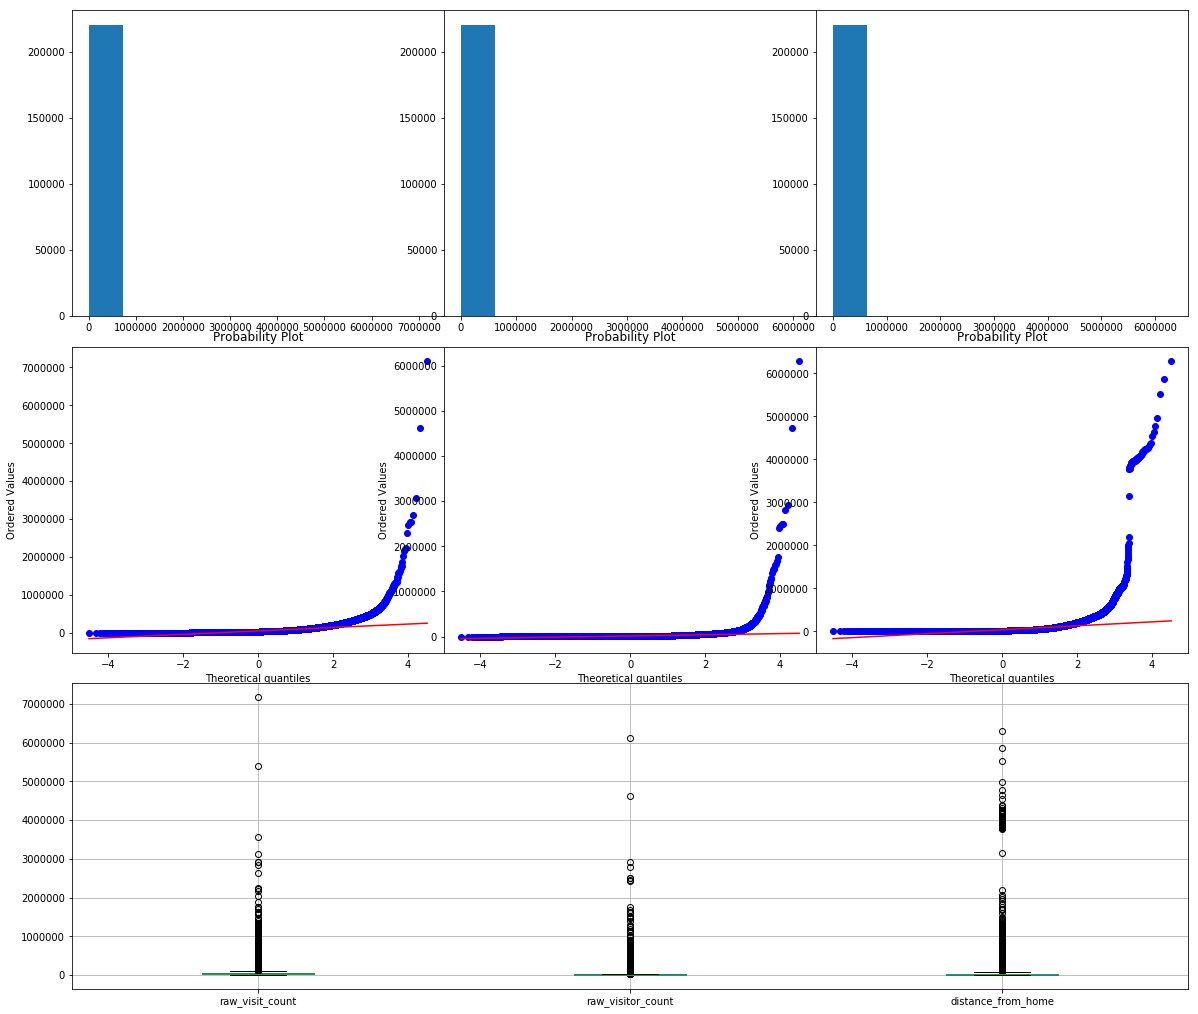

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats
fig = plt.figure(figsize=(20,18)) # 建立一个20*18的画布


for i in range(1,4):
    hist = fig.add_subplot(3,3,i)
    plt.hist(data[draw_list[i-1]].dropna())

for i in range(1,4):
    pro = fig.add_subplot(3,3,i+3)
    res = stats.probplot(data[draw_list[i-1]].dropna(), plot=pro)

bx = fig.add_subplot(3,3,(7,9))
data[draw_list].boxplot()
plt.subplots_adjust(wspace=0, hspace=0.1)

最开始绘制出直方图的时候觉得有些奇怪，因为他只有一个范围有数值，其余没有
结合QQ图，发现绝大部分数据分布在2000000以下，部分数据（离群点）过大，使得直方图的x取值范围过大。
如果我们只取2000000以下的数据进行绘制，那么直方图的效果会好很多。

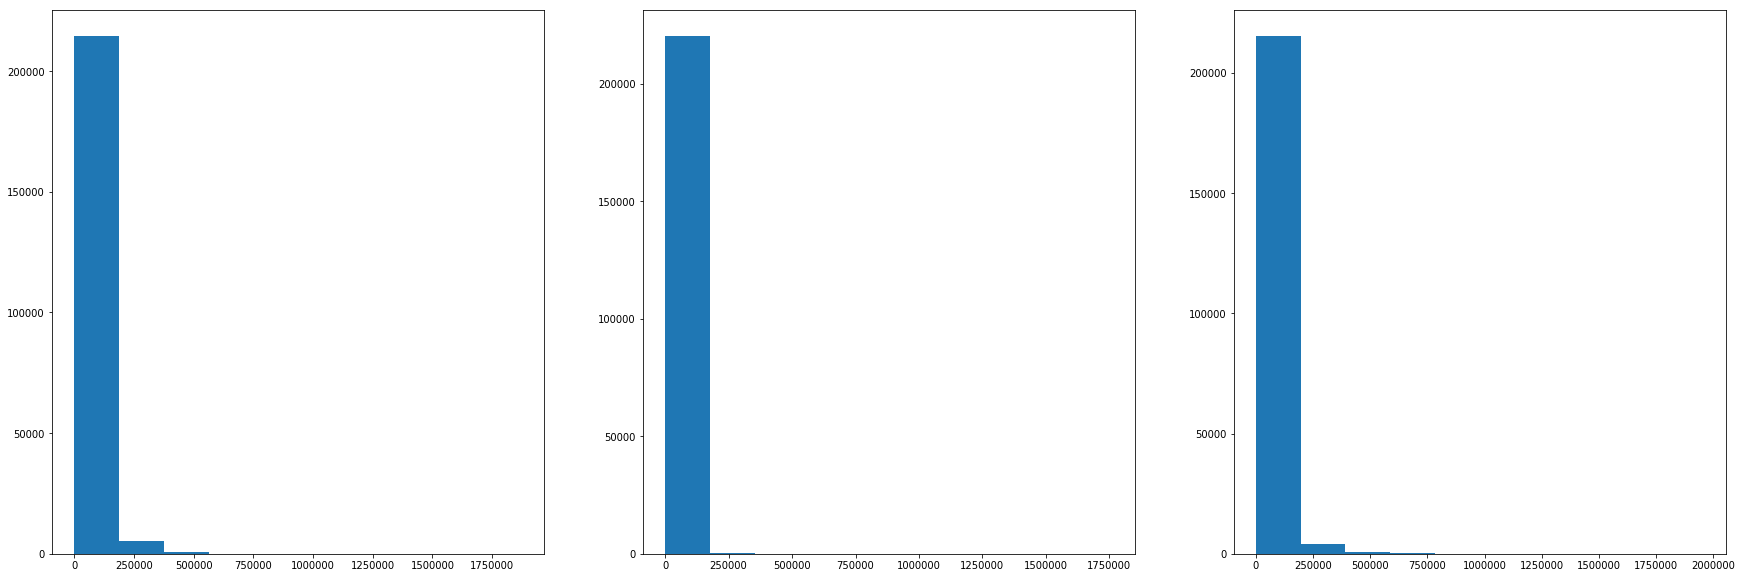

In [10]:
fig = plt.figure(figsize=(30,10)) # 建立一个20*18的画布}
for i in range(1,4):
    hist = fig.add_subplot(1,3,i)
    t_series = data[draw_list[i-1]].dropna()
    most = t_series[(t_series<2000000)]
    plt.hist(most,)

## 数据缺失的处理
### 缺失值分析

数值属性

In [11]:
data_numeric.isna().sum() # 查看各属性缺失值个数

date_range_start        0
date_range_end          0
raw_visit_count       106
raw_visitor_count     106
distance_from_home    217
P_by_hour_0           106
P_by_hour_1           106
P_by_hour_2           106
P_by_hour_3           106
P_by_hour_4           106
P_by_hour_5           106
P_by_hour_6           106
P_by_hour_7           106
P_by_hour_8           106
P_by_hour_9           106
P_by_hour_10          106
P_by_hour_11          106
P_by_hour_12          106
P_by_hour_13          106
P_by_hour_14          106
P_by_hour_15          106
P_by_hour_16          106
P_by_hour_17          106
P_by_hour_18          106
P_by_hour_19          106
P_by_hour_20          106
P_by_hour_21          106
P_by_hour_22          106
P_by_hour_23          106
P_by_Monday           106
P_by_Tuesday          106
P_by_Wednesday        106
P_by_Thursday         106
P_by_Friday           106
P_by_Saturday         106
P_by_Sunday           106
dtype: int64

In [12]:
d=["popularity_by_hour", "popularity_by_day"]
data_numeric_pure = data[Numeric_Attributes].copy()
for attribute in d:
    data_numeric_pure[attribute] = data_numeric_pure[attribute].apply(lambda x: np.nan if len(x)==2 else json.loads(x))    
    
data_numeric_pure.isna().sum()

date_range_start        0
date_range_end          0
raw_visit_count       106
raw_visitor_count     106
distance_from_home    217
popularity_by_hour    106
popularity_by_day     106
dtype: int64

In [13]:
data[data["raw_visit_count"].isna()]

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220629,2.605399e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220630,6.912099e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220631,7.205799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220632,2.060000e+10,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220633,3.600394e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220634,6.601095e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220635,7.210999e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220636,4.508997e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220637,6.002095e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220638,3.504394e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}


raw_visit_count为空时，对应的其他属性除date_range_start、date_range_end之外，均为空
猜测可能缺失的原因是， 1538352000 1541030400这个时间段对应的census_block_group没有人访问，或者是没有统计

标称属性

In [14]:
data_nominal = data[Nominal_Attributes].copy()
for attribute in Nominal_Attributes:
    data_nominal[attribute] = data_nominal[attribute].apply(lambda x: np.nan if len(x)==2 else json.loads(x))
        
data_nominal.isna().sum()

visitor_home_cbgs           28412
visitor_work_cbgs           51152
related_same_day_brand      35542
related_same_month_brand     2983
top_brands                  74540
dtype: int64

In [15]:
data_pure=pd.DataFrame()
data_pure["census_block_group"] = data["census_block_group"]
data_pure[Nominal_Attributes] = data_nominal
data_pure[Numeric_Attributes] = data_numeric_pure

data_pure.isna().sum()

census_block_group              1
visitor_home_cbgs           28412
visitor_work_cbgs           51152
related_same_day_brand      35542
related_same_month_brand     2983
top_brands                  74540
date_range_start                0
date_range_end                  0
raw_visit_count               106
raw_visitor_count             106
distance_from_home            217
popularity_by_hour            106
popularity_by_day             106
dtype: int64

data_pure包含了全部解析后的数据，上面是全部属性的缺失情况


### 缺失值处理


+ 将缺失部分剔除

In [16]:
data_dropna = data_pure.dropna()
data_dropna.isna().sum()

census_block_group          0
visitor_home_cbgs           0
visitor_work_cbgs           0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
distance_from_home          0
popularity_by_hour          0
popularity_by_day           0
dtype: int64

+ 用最高频率值来填补缺失值

In [17]:
data_frequency = data_dropna.copy()

def find_frequency(d):
    va = max(d.values())
    for k,v in d.items():
        if v==va:
            return k
a={'1':1,'2':2}
find_frequency(a)
for i in range(len(Nominal_Attributes)):
    filler = find_frequency(valueCounts[i])
    data_frequency[Nominal_Attributes[i]].fillna(filler,inplace=True)
    print(Nominal_Attributes[i],"'s na filled with ",filler)


# data_frequency.isna().sum()

visitor_home_cbgs 's na filled with  481576731011
visitor_work_cbgs 's na filled with  170318391001
related_same_day_brand 's na filled with  mcdonalds
related_same_month_brand 's na filled with  mcdonalds
top_brands 's na filled with  United States Postal Service (USPS)


In [39]:
draw_list2 = ["raw_visit_count", "raw_visitor_count", "distance_from_home"]

for attribute in draw_list2:
    filler = data_pure[attribute].value_counts().index[0] # 对每个属性，找到分类排名第一的索引，作为filler
    data_frequency[attribute].fillna(filler,inplace=True)
    print(attribute,"'s na filled with ",filler)
# data_pure["distance_from_home"].value_counts().index[0]

raw_visit_count 's na filled with  24531.0
raw_visitor_count 's na filled with  2292.0
distance_from_home 's na filled with  8345.0


+ 使用属性之间的相关关系填补缺失值


In [43]:
data_dropna.corr()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
census_block_group,1.000000,NaN,NaN,-0.026255,-0.029032,0.016460
date_range_start,NaN,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN,NaN
raw_visit_count,-0.026255,NaN,NaN,1.000000,0.901485,0.091015
raw_visitor_count,-0.029032,NaN,NaN,0.901485,1.000000,0.175434
distance_from_home,0.016460,NaN,NaN,0.091015,0.175434,1.000000


除了raw_visit_count与raw_visitor_count，其余属性之间的相关性都不大
从意义上讲raw_visit_count与raw_visitor_count就是相关的，因为前者是Number of visits，后者是Number of unique visitors

### 可视化地对比新旧数据集

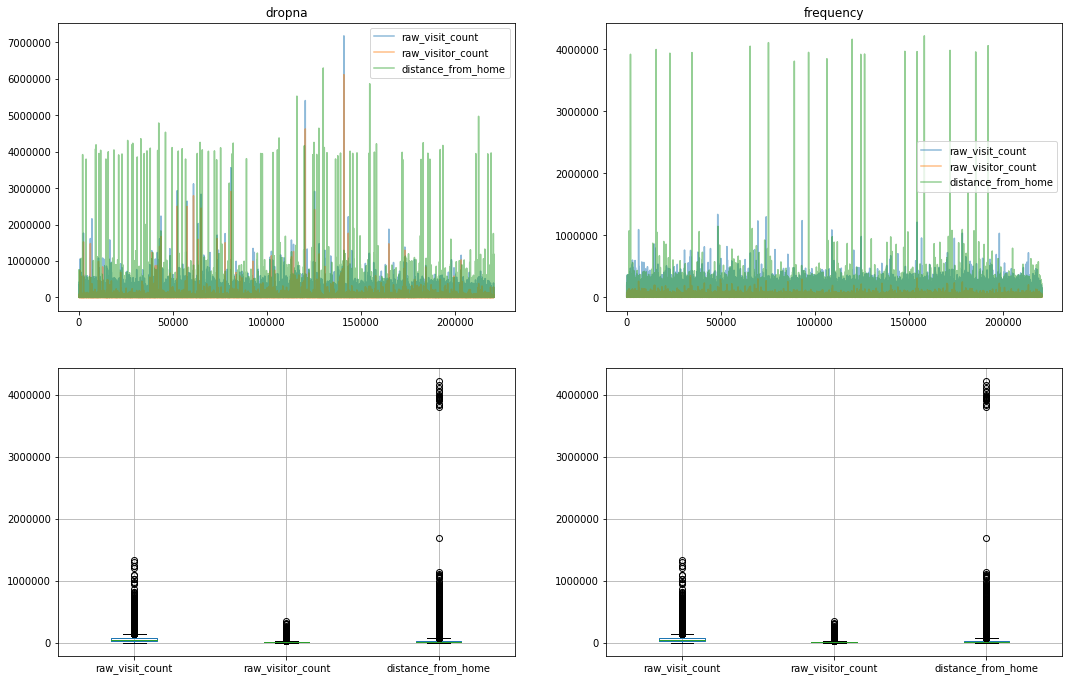

In [53]:

fig = plt.figure(figsize=(18,18)) 
plot1 = fig.add_subplot(3,2,1)
data[draw_list2].dropna().plot(alpha=0.5,ax=plot1,title="dropna")
plot2 = fig.add_subplot(3,2,2)
data_frequency[draw_list2].plot(alpha=0.5,ax=plot2,title="frequency")  
box1 = fig.add_subplot(3,2,3)
data_dropna[draw_list].boxplot()
box2 = fig.add_subplot(3,2,4)
data_frequency[draw_list].boxplot()


这里用"raw_visit_count", "raw_visitor_count", "distance_from_home"这三个属性，进行对比，左图为将缺失部分剔除，右图为用最高频率值来填补缺失值

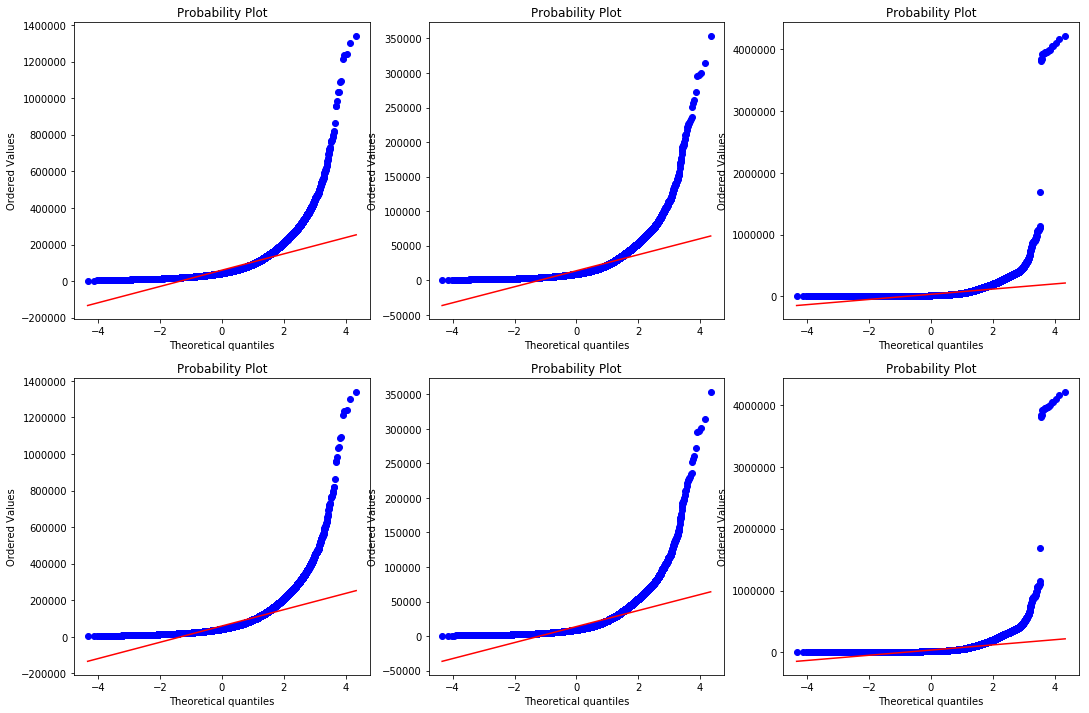

In [57]:
fig = plt.figure(figsize=(18,12)) 
for i in range(1,4):
    pro1 = fig.add_subplot(2,3,i)
    res = stats.probplot(data_dropna[draw_list[i-1]], plot=pro1)
    
for i in range(1,4):
    pro2 = fig.add_subplot(2,3,i+3)
    res = stats.probplot(data_frequency[draw_list[i-1]], plot=pro2)